<a href="https://colab.research.google.com/github/manhanton/DataInsight/blob/master/technical_screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3MB 34.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=4e7ffbf69b5d8e239a9ceceaa142c0a82fcd14fcdd074629918a0687aba3d4d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-eq40rncm/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,207.534515,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,208.769211,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,208.603333,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,209.349670,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,208.658646,46939700
...,...,...,...,...,...,...
2017-04-24,237.179993,237.410004,234.559998,237.169998,219.477432,119209900
2017-04-25,237.910004,238.949997,237.809998,238.550003,220.754486,76698300
2017-04-26,238.509995,239.529999,238.350006,238.399994,220.615677,84702500


In [10]:
from datetime import datetime
import yfinance as yf
#import mplfinance as mpf
import pandas as pd
from datetime import datetime

series_list = ['EURJPY', 'DX-Y.NYB', 'CL=F']
start = datetime(2000, 1, 1)
end = datetime.now()

def get_yahoo_data(series_list, start, end):
    yahoo_df = pd.DataFrame()
    for i, series in enumerate(series_list):
        print('Calling YAHOO API for Series:  {}'.format(series))
        if i == 0:
            yahoo_df = pdr.get_data_yahoo(series['Close'], start, end)
        else:
            _df = pdr.get_data_yahoo(series, start, end)
            yahoo_df = yahoo_df.join(_df, how='outer')
    return yahoo_df

yahoo_df = get_yahoo_data(series_list, start, end)
yahoo_df.tail(10)

Calling YAHOO API for Series:  EURJPY


TypeError: ignored

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 71kB 7.0MB/s 


In [55]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "EURJPY=X CL=F",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "4y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1wk",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [56]:
data

CL=F                        ...    EURJPY=X                   
                 Open       High        Low  ...         Low       Close Volume
Date                                         ...                               
2017-07-10  45.439999  46.740002  44.990002  ...  128.533005  128.972000    0.0
2017-07-17  46.680000  47.549999  45.540001  ...  128.576996  129.591003    0.0
2017-07-24  45.619999  49.810001  45.400002  ...  128.886002  129.811005    0.0
2017-07-31  49.849998  50.430000  48.369999  ...  129.591995  130.481003    0.0
2017-08-07  49.590000  50.220001  47.980000  ...  128.048004  129.139999    0.0
...               ...        ...        ...  ...         ...         ...    ...
2021-06-21  71.519997  74.250000  71.150002  ...  130.061005  132.228119    0.0
2021-06-28  73.989998  76.220001  71.970001  ...  131.259995  131.748932    0.0
2021-07-05  75.349998  76.980003  70.760002  ...  129.630005  130.813278    0.0
2021-07-12  74.739998  74.930000  73.160004  ...  130.462997  130.848999    0.0
2021-07-13  74.180000  74.739998  74.029999  ...  130.460007  130.511002    0.0

[211 rows x 10 columns]

In [57]:
data.columns = data.columns.map('|'.join).str.strip('|')

<Figure size 2000x600 with 0 Axes>

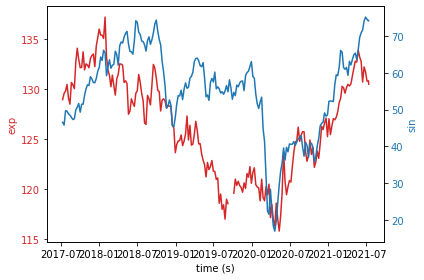

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=100)

# Create some mock data
t = data.index
data1 = data['EURJPY=X|Close']
data2 = data['CL=F|Close']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()